In [37]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [54]:
# constants not to change

N = 2
M = 2
V = 1


In [63]:
def J_V_ratio_time_function(t, J_0, J_f, T):
    # example using linear interpolation
    return J_0 + (J_f - J_0)*(t/T)


J_0 = 10
J_f = 0

T = 10
dt = 0.01
times = np.linspace(0,T,int(T/dt))

hamiltonians = []
for t in times:
    hamiltonian = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio=0,J_V_ratio=J_V_ratio_time_function(t=t,J_0=J_0,J_f=J_f,T=T))
    hamiltonians.append(hamiltonian)

In [64]:
time_derivatives = []
frobenius_norms = []
for idx in range(1,len(hamiltonians)):
    dh_dt = (hamiltonians[idx] - hamiltonians[idx-1])/dt
    time_derivatives.append(dh_dt)
    
    frobenius_norm = np.linalg.norm(dh_dt)
    frobenius_norms.append(frobenius_norm)

Text(0.5, 0, 'Time')

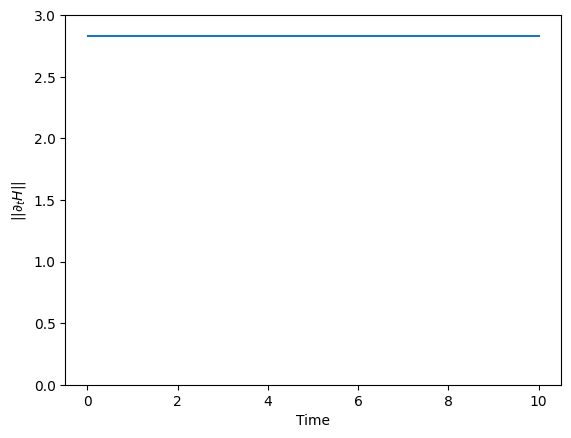

In [66]:
fig, ax = plt.subplots()
ax.plot(times[1:], frobenius_norms)
ax.set_ylim(0,3)
ax.set_ylabel("$||\partial_t H||$")
ax.set_xlabel("Time")